In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import arima_model
from sklearn.metrics import mean_absolute_error
%matplotlib inline

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [89]:
data = pd.read_csv("/Users/harshitsrivastava/Desktop/NYC-Crime/NYPD_Complaint_Data_Historic.csv")

In [90]:
for col in data:
    print col, data[col].isnull().sum()

CMPLNT_NUM 0
CMPLNT_FR_DT 655
CMPLNT_FR_TM 48
CMPLNT_TO_DT 1472786
CMPLNT_TO_TM 1468882
RPT_DT 0
KY_CD 0
OFNS_DESC 18892
PD_CD 4909
PD_DESC 4909
CRM_ATPT_CPTD_CD 7
LAW_CAT_CD 0
JURIS_DESC 0
BORO_NM 463
ADDR_PCT_CD 390
LOC_OF_OCCUR_DESC 1223392
PREM_TYP_DESC 35198
PARKS_NM 5567497
HADEVELOPT 5302218
X_COORD_CD 195868
Y_COORD_CD 195868
Latitude 195868
Longitude 195868
Lat_Lon 195868


In [32]:
data['BORO_NM'].unique()

array(['BRONX', 'QUEENS', 'MANHATTAN', 'BROOKLYN', 'STATEN ISLAND', nan], dtype=object)

In [56]:
by_desc = data.groupby(['JURIS_DESC']).size()

In [57]:
by_desc

JURIS_DESC
AMTRACK                                    162
CONRAIL                                     14
DEPT OF CORRECTIONS                       6515
DISTRICT ATTORNEY OFFICE                     1
FIRE DEPT (FIRE MARSHAL)                   514
HEALTH & HOSP CORP                        2801
LONG ISLAND RAILRD                         461
METRO NORTH                                595
N.Y. HOUSING POLICE                     428947
N.Y. POLICE DEPT                       4960669
N.Y. STATE PARKS                           320
N.Y. STATE POLICE                         1351
N.Y. TRANSIT POLICE                     120785
NEW YORK CITY SHERIFF OFFICE               164
NYC DEPT ENVIRONMENTAL PROTECTION           14
NYC PARKS                                  131
NYS DEPT ENVIRONMENTAL CONSERVATION          1
NYS DEPT TAX AND FINANCE                    82
OTHER                                    14964
POLICE DEPT NYC                           8987
PORT AUTHORITY                           27089
SE

In [12]:
by_type = df.groupby(['PREM_TYP_DESC']).size()

In [62]:
try:
    data['CMPLNT_FR_DT'] =pd.to_datetime(data.CMPLNT_FR_DT)
except OutOfBoundsDatetime:
    pass

NameError: name 'OutOfBoundsDatetime' is not defined

In [63]:
data

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


In [17]:
day = list(day)

In [18]:
day.sort()

In [18]:
df['CMPLNT_FR_DT'][3].year()

AttributeError: 'str' object has no attribute 'year'

# Using the Sample Output Files

In [7]:
df1 = pd.read_csv("crime-data-by-year/2006_data.out", header = -1, delimiter = "'")
df1[2] = df1[2].str.replace(',', '')
df1[2] = df1[2].str.replace(')', '')
df1[1] = pd.to_datetime(df1[1])
df1 = df1.drop(0, axis=1)
df1.columns = ['Date', 'Incidents']
df1['Incidents'] = df1['Incidents'].astype('int')

df2 = pd.read_csv("crime-data-by-year/2007_data.out", header = -1, delimiter = "'")
df2[2] = df2[2].str.replace(',', '')
df2[2] = df2[2].str.replace(')', '')
df2[1] = pd.to_datetime(df2[1])
df2 = df2.drop(0, axis=1)
df2.columns = ['Date', 'Incidents']
df2['Incidents'] = df2['Incidents'].astype('int')

df3 = pd.read_csv("crime-data-by-year/2008_data.out", header = -1, delimiter = "'")
df3[2] = df3[2].str.replace(',', '')
df3[2] = df3[2].str.replace(')', '')
df3[1] = pd.to_datetime(df3[1])
df3 = df3.drop(0, axis=1)
df3.columns = ['Date', 'Incidents']
df3['Incidents'] = df3['Incidents'].astype('int')

df4 = pd.read_csv("crime-data-by-year/2009_data.out", header = -1, delimiter = "'")
df4[2] = df4[2].str.replace(',', '')
df4[2] = df4[2].str.replace(')', '')
df4[1] = pd.to_datetime(df4[1])
df4 = df4.drop(0, axis=1)
df4.columns = ['Date', 'Incidents']
df4['Incidents'] = df4['Incidents'].astype('int')

df5 = pd.read_csv("crime-data-by-year/2010_data.out", header = -1, delimiter = "'")
df5[2] = df5[2].str.replace(',', '')
df5[2] = df5[2].str.replace(')', '')
df5[1] = pd.to_datetime(df5[1])
df5 = df5.drop(0, axis=1)
df5.columns = ['Date', 'Incidents']
df5['Incidents'] = df5['Incidents'].astype('int')

df6 = pd.read_csv("crime-data-by-year/2011_data.out", header = -1, delimiter = "'")
df6[2] = df6[2].str.replace(',', '')
df6[2] = df6[2].str.replace(')', '')
df6[1] = pd.to_datetime(df6[1])
df6 = df6.drop(0, axis=1)
df6.columns = ['Date', 'Incidents']
df6['Incidents'] = df6['Incidents'].astype('int')

df7 = pd.read_csv("crime-data-by-year/2012_data.out", header = -1, delimiter = "'")
df7[2] = df7[2].str.replace(',', '')
df7[2] = df7[2].str.replace(')', '')
df7[1] = pd.to_datetime(df7[1])
df7 = df7.drop(0, axis=1)
df7.columns = ['Date', 'Incidents']
df7['Incidents'] = df7['Incidents'].astype('int')

df8 = pd.read_csv("crime-data-by-year/2013_data.out", header = -1, delimiter = "'")
df8[2] = df8[2].str.replace(',', '')
df8[2] = df8[2].str.replace(')', '')
df8[1] = pd.to_datetime(df8[1])
df8 = df8.drop(0, axis=1)
df8.columns = ['Date', 'Incidents']
df8['Incidents'] = df8['Incidents'].astype('int')

df9 = pd.read_csv("crime-data-by-year/2014_data.out", header = -1, delimiter = "'")
df9[2] = df9[2].str.replace(',', '')
df9[2] = df9[2].str.replace(')', '')
df9[1] = pd.to_datetime(df9[1])
df9 = df9.drop(0, axis=1)
df9.columns = ['Date', 'Incidents']
df9['Incidents'] = df9['Incidents'].astype('int')

df10 = pd.read_csv("crime-data-by-year/2015_data.out", header = -1, delimiter = "'")
df10[2] = df10[2].str.replace(',', '')
df10[2] = df10[2].str.replace(')', '')
df10[1] = pd.to_datetime(df10[1])
df10 = df10.drop(0, axis=1)
df10.columns = ['Date', 'Incidents']
df10['Incidents'] = df10['Incidents'].astype('int')

df11 = pd.read_csv("crime-data-by-year/2016_data.out", header = -1, delimiter = "'")
df11[2] = df11[2].str.replace(',', '')
df11[2] = df11[2].str.replace(')', '')
df11[1] = pd.to_datetime(df11[1])
df11 = df11.drop(0, axis=1)
df11.columns = ['Date', 'Incidents']
df11['Incidents'] = df11['Incidents'].astype('int')

In [8]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(frames)

df = df.set_index('Date')
df.sort_index(inplace=True)
df['Incidents'] = df['Incidents'].astype('int')

In [9]:
df11 = df11.set_index('Date')
df11.sort_index(inplace=True)
df11

,Incidents
Date,
2016-01-01,2152
2016-01-02,1192
2016-01-03,1077
2016-01-04,1092
2016-01-05,1043
2016-01-06,1279
2016-01-07,1224
2016-01-08,1408
2016-01-09,1380


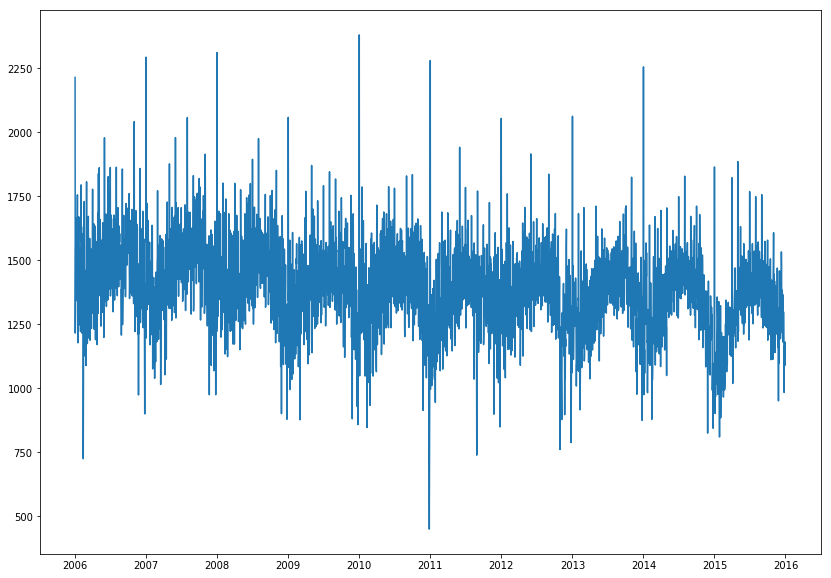

In [127]:
plt.figure(figsize=(14, 10))
plt.plot(df['Incidents'])
#plt.xticks(df['Year'])

In [182]:
df['Incidents'][2]

' 1395'

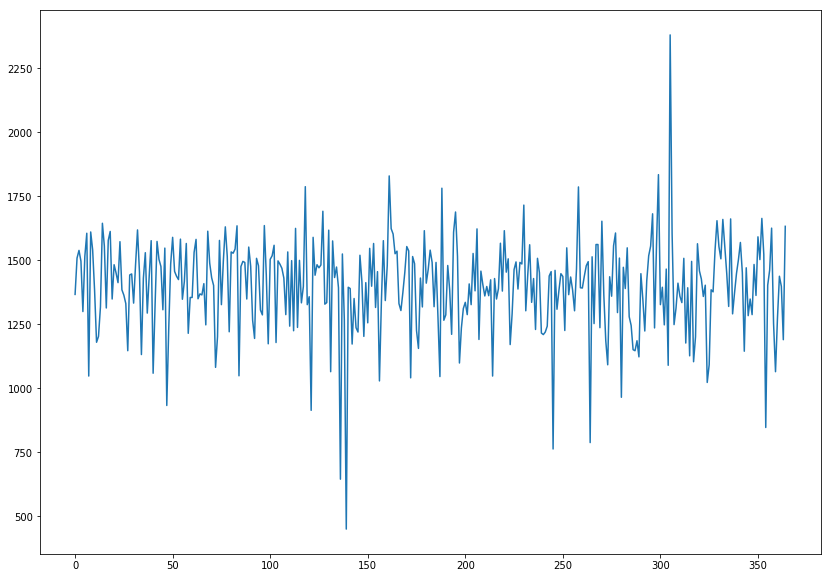

In [16]:
plt.figure(figsize=(14, 10))
plt.plot(df5['Incidents'])

In [128]:
df['Year'] = np.nan
df['Day_Year'] = np.nan
df['Day_Month'] = np.nan
df['Month'] = np.nan

for i in range(0, len(df.index)):
    df['Year'][i] = df.index[i].year
    
    # Creating new column for storing Day of the Year
    df['Day_Year'][i] = df.index[i].timetuple().tm_yday
    
    # Creating new column for storing Day of the Month
    df['Day_Month'][i] = df.index[i].day
    
    # Creating new column for storing Month
    df['Month'][i] = df.index[i].month
    
df['Year'] = df['Year'].astype('int')
df['Incidents'] = df['Incidents'].astype('int')


/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/

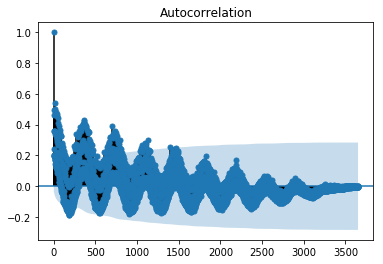

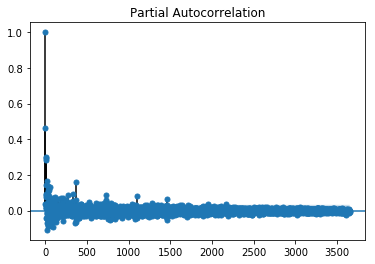

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

N_Inc = df['Incidents']

fig = plt.figure(figsize=[24, 20])
fig = plot_acf(N_Inc)          # Plotting Auto-correlation function
fig = plot_pacf(N_Inc)         # Plotting Partial auto-correlation function
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(df['Incidents'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                   -3.275674
p-value                           0.016002
#Lags Used                       30.000000
Number of Observations Used    3621.000000
Critical Value (5%)              -2.862339
Critical Value (1%)              -3.432157
Critical Value (10%)             -2.567195
dtype: float64


In [164]:
npdf = df['Incidents'].astype(float)
results = arima_model.ARMA(npdf,(10, 3)).fit()


# Creating Series of Actual Values
N_Strikes = df['Incidents']
N_Strikes_sub = N_Strikes.loc['2005-01-01': '2015-12-31']

forecast = results.forecast(steps = 5)[0]

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [165]:
forecast

array([ 1190.42305094,  1227.04523318,  1197.23675186,  1196.10290351,
        1225.88870842])

In [161]:
df11

,Incidents
Date,
2016-01-01,2152
2016-01-02,1192
2016-01-03,1077
2016-01-04,1092
2016-01-05,1043
2016-01-06,1279
2016-01-07,1224
2016-01-08,1408
2016-01-09,1380


In [29]:
npdf = df['Incidents'].astype(float)
results = arima_model.ARMA(npdf,(20, 5)).fit()


# Creating Series of Actual Values
N_Strikes = df['Incidents']
N_Strikes_sub = N_Strikes.loc['2015-01-01': '2015-12-31']

forecast = results.predict(start='2015-01-01', end='2015-12-31', dynamic= True)

# Mean Absolute Error
MAE = mean_absolute_error(N_Strikes_sub, forecast)
print "\n"
print ("Mean Absolute Error (MAE): {}".format(MAE), "p:", k, "q:", j)

# Mean Forecast Error
forecast_error = [N_Strikes_sub[i]-forecast[i] for i in range(len(N_Strikes_sub))]
MFE = (sum(forecast_error))/len(N_Strikes)
print ("Mean Forecast Error (MFE): {}".format(MFE), "p:", k, "q:", j)
        
MSE = mean_squared_error(N_Strikes_sub, forecast)
print ("Mean Squared Error (MSE): {}".format(MSE), "p:", k, "q:", j)

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)




('Mean Absolute Error (MAE): 169.420556149', 'p:', 25, 'q:', 0)
('Mean Forecast Error (MFE): 15.1584695411', 'p:', 25, 'q:', 0)
('Mean Squared Error (MSE): 42236.804846', 'p:', 25, 'q:', 0)


In [124]:
from sklearn.metrics import mean_squared_error

### Generating MAE and MFE for multiple parameters in ARMA model
#data_byyear.index = pd.to_datetime(data_byyear.index, format='%Y')

for j in range(0, 5):
    for k in range(0, 10):
        try:
            # Using p=2 and q=0, building the ARMA model
            npdf = df['Incidents'].astype(float)
            results = arima_model.ARMA(npdf,(k, j)).fit()
            #print (results)
        except ValueError:
            continue

        # Creating Series of Actual Values
        N_Strikes = df['Incidents']
        N_Strikes_sub = N_Strikes.loc['2015-01-01': '2015-12-31']

        forecast = results.predict(start='2015-01-01', end='2015-12-31', dynamic= True)

        # Mean Absolute Error
        MAE = mean_absolute_error(N_Strikes_sub, forecast)
        print "\n"
        print ("Mean Absolute Error (MAE): {}".format(MAE), "p:", k, "q:", j)

        # Mean Forecast Error
        forecast_error = [N_Strikes_sub[i]-forecast[i] for i in range(len(N_Strikes_sub))]
        MFE = (sum(forecast_error))/len(N_Strikes)
        print ("Mean Forecast Error (MFE): {}".format(MFE), "p:", k, "q:", j)
        
        MSE = mean_squared_error(N_Strikes_sub, forecast)
        print ("Mean Squared Error (MSE): {}".format(MSE), "p:", k, "q:", j)

KeyError: 'Incidents'

In [270]:
df10 = df10.set_index('Date')
df10.sort_index(inplace=True)

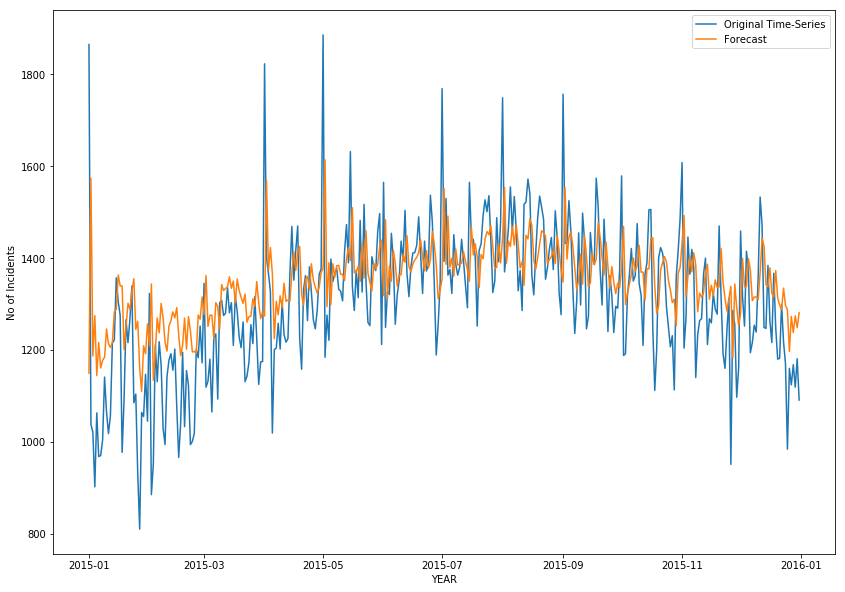

In [146]:
from statsmodels.tsa import arima_model

#data_byyear.index = pd.to_datetime(data_byyear.index, format='%Y')

# Using p=3 and q=1, building the ARMA model
npdf = df['Incidents'].astype(float)
results = arima_model.ARMA(npdf,(3, 0)).fit()
print (results)

# Forecasting using the ARMA model defined above
df['forecast'] = results.predict(start='2015-01-01', end='2015-12-31', dynamic= False) 

# Plotting the forecast along with the actual data
plt.figure(figsize=(14, 10))
plt.plot(df10['Incidents'], label = 'Original Time-Series')
plt.plot(df['forecast'], label = 'Forecast')
plt.xlabel('YEAR')
plt.ylabel('No of Incidents')
plt.legend()
plt.show()

In [234]:
df11 = pd.read_csv("crime-data-by-year/2016_data.out", header = -1, delimiter = "'")
df11[2] = df11[2].str.replace(',', '')
df11[2] = df11[2].str.replace(')', '')
df11[1] = pd.to_datetime(df11[1])
df11 = df11.drop(0, axis=1)
df11.columns = ['Date', 'Incidents']
df11['Incidents'] = df11['Incidents'].astype('int')
df11 = df11.set_index('Date')
df11.sort_index(inplace=True)

df10['Incidents'] = df10['Incidents'].astype('int')
df10 = df10.set_index('Date')
df10.sort_index(inplace=True)

In [245]:
npdf = df['Incidents'].astype(float)
results4 = arima_model.ARMA(npdf,(4, 2)).fit()
print (results4)

# Forecasting using the ARMA model defined above
forecast = results4.predict(start='2014-01-01', end='2014-12-31', dynamic= False) 

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(df['Incidents'], label = 'Original Time-Series')
plt.plot(forecast, label = 'Forecast')
plt.xlabel('YEAR')
plt.ylabel('No of Incidents')
plt.legend()
plt.show()

In [145]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                   -2.898669
p-value                           0.045503
#Lags Used                       22.000000
Number of Observations Used    1438.000000
Critical Value (5%)              -2.863552
Critical Value (1%)              -3.434906
Critical Value (10%)             -2.567841
dtype: float64


In [153]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(N_Strikes_sub, forecast)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 157.723727


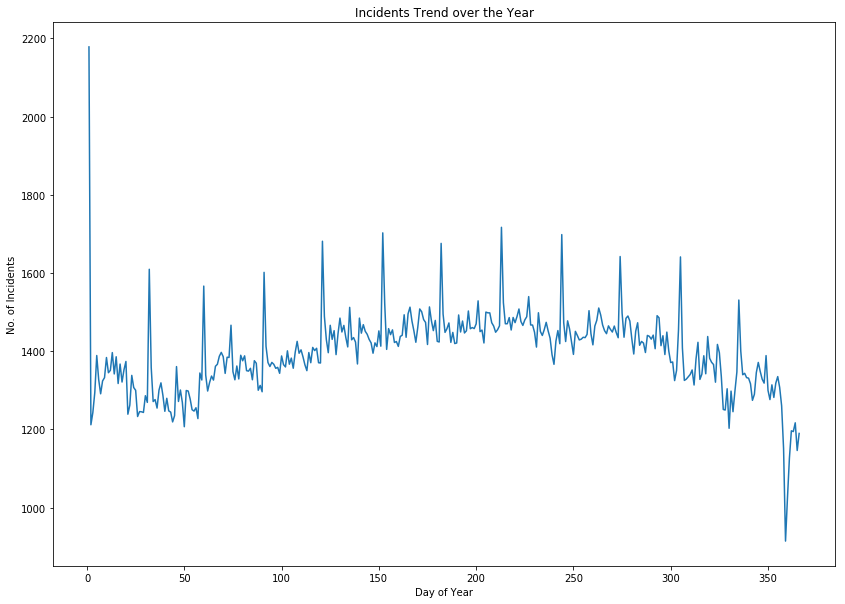

In [139]:
day = df.groupby(['Day_Year'])['Incidents'].mean()

plt.figure(figsize=(14, 10))
plt.title("Incidents Trend over the Year")
plt.plot(day)
plt.ylabel("No. of Incidents")
plt.xlabel("Day of Year")
#plt.xticks(df.index)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
CLS = RandomForestRegressor(max_depth=10,n_estimators=10)
CLS.fit(X_train, Y_train)

In [122]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X_train) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Correlation with Temperature

In [37]:
# 2016 Data

weather = pd.read_csv('NYC_Weather.csv')

In [26]:
weather['date'] =pd.to_datetime(weather.date)
weather = weather.set_index('date')

In [33]:
d1 = weather['average temperature']
d2 = df11['Incidents']

In [39]:
from scipy.stats import spearmanr

corr, pvalue = spearmanr(d1, d2)
print "Sample Size:\t\t\t\t\t\t", len(d1)
print "Correlation between Temperature and Number of Incidents\t", corr
print "Probability that 2 datasets are NOT connected:\t\t", pvalue

Sample Size:						366
Correlation between Temperature and Number of Incidents	0.608202764393
Probability that 2 datasets are NOT connected:		2.1195302026e-38
